<a href="https://colab.research.google.com/github/gbr125/malign/blob/main/Klasifikasi_bunga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, untar = True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 3s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

good starting point for batch size is from 32, 64, 128, 256, 500

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 367 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


9 gambar random dari data

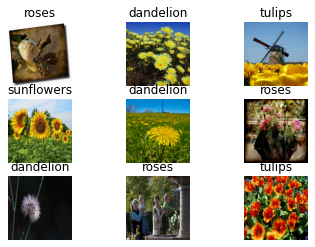

In [ ]:
plt.figurefigsize = (10, 10)
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


1 img = R, G, B / 3 channel

rentang 1 channel = 0 - 255


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y : (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.96902645


Proses Convolutional Layer

In [ ]:
num_classes = 5

model = Sequential([
      layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
      #ConvLayer1
      layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
      layers.MaxPool2D(),

      #ConvLayer2
      layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
      layers.MaxPool2D(),
      
      #ConvLayer3
      layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
      layers.MaxPool2D(),

      #FullyConnectedLayer 
      layers.Flatten(),
      layers.Dense(128, activation = 'relu') ,
      layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
              ) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
104/104 [==============================] - 41s 109ms/step - loss: 1.4485 - accuracy: 0.3963 - val_loss: 1.1462 - val_accuracy: 0.5395
Epoch 2/10
104/104 [==============================] - 10s 93ms/step - loss: 1.0267 - accuracy: 0.5961 - val_loss: 1.0730 - val_accuracy: 0.5559
Epoch 3/10
104/104 [==============================] - 10s 91ms/step - loss: 0.8536 - accuracy: 0.6649 - val_loss: 1.0230 - val_accuracy: 0.6267
Epoch 4/10
104/104 [==============================] - 10s 92ms/step - loss: 0.6491 - accuracy: 0.7596 - val_loss: 1.0156 - val_accuracy: 0.6267
Epoch 5/10
104/104 [==============================] - 10s 93ms/step - loss: 0.4843 - accuracy: 0.8268 - val_loss: 1.2295 - val_accuracy: 0.5804
Epoch 6/10
104/104 [==============================] - 10s 92ms/step - loss: 0.2970 - accuracy: 0.8995 - val_loss: 1.4232 - val_accuracy: 0.5967
Epoch 7/10
104/104 [==============================] - 10s 93ms/step - loss: 0.1787 - accuracy: 0.9401 - val_loss: 1.4421 - val_accuracy

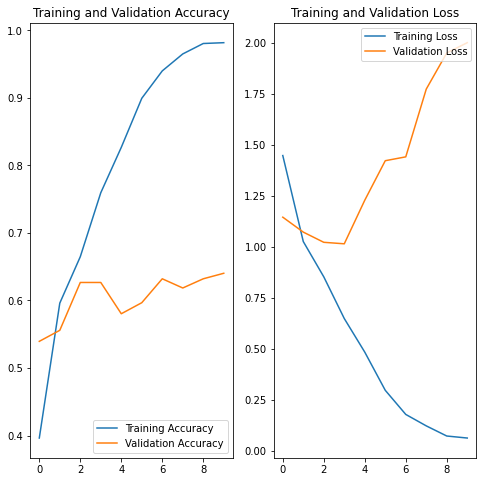

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal",
                                                  input_shape = (img_height, img_width, 3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

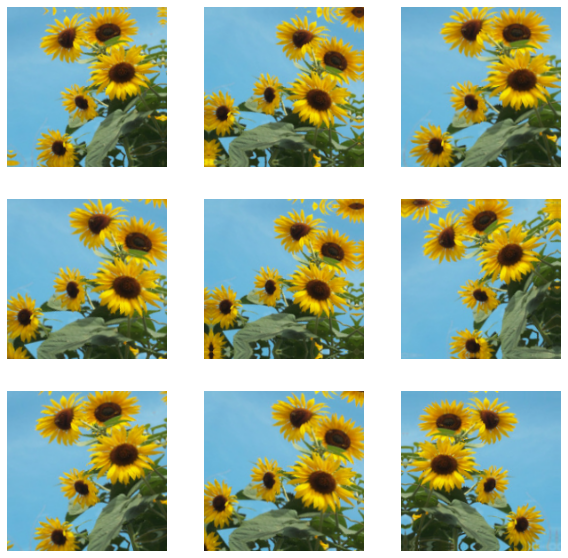

In [ ]:
plt.figure(figsize = (10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_image = data_augmentation(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image[1].numpy().astype('uint8'))
    plt.axis("off")

In [ ]:
num_classes = 5

model = Sequential([
      data_augmentation,
      layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
      #ConvLayer1
      layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
      layers.MaxPool2D(),

      #ConvLayer2
      layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
      layers.MaxPool2D(),
      
      #ConvLayer3
      layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
      layers.MaxPool2D(),

      #dropout
      layers.Dropout(0.2),

      #FullyConnectedLayer 
      layers.Flatten(),
      layers.Dense(128, activation = 'relu') ,
      layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
              ) 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
104/104 [==============================] - 12s 99ms/step - loss: 1.2980 - accuracy: 0.4608 - val_loss: 1.1940 - val_accuracy: 0.4986
Epoch 2/10
104/104 [==============================] - 11s 98ms/step - loss: 1.0055 - accuracy: 0.6013 - val_loss: 1.0174 - val_accuracy: 0.6131
Epoch 3/10
104/104 [==============================] - 12s 110ms/step - loss: 0.9014 - accuracy: 0.6391 - val_loss: 0.8663 - val_accuracy: 0.6703
Epoch 4/10
104/104 [==============================] - 11s 99ms/step - loss: 0.8383 - accuracy: 0.6809 - val_loss: 0.8425 - val_accuracy: 0.7030
Epoch 5/10
104/104 [==============================] - 11s 98ms/step - loss: 0.7914 - accuracy: 0.6979 - val_loss: 0.8658 - val_accuracy: 0.6458
Epoch 6/10
104/104 [==============================] - 12s 112ms/step - loss: 0.7385 - accuracy: 0.7209 - val_loss: 0.8221 - val_accuracy: 0.7084
Epoch 7/10
104/104 [==============================] - 11s 99ms/step - loss: 0.7203 - accuracy: 0.7248 - val_loss: 0.7497 - val_accurac

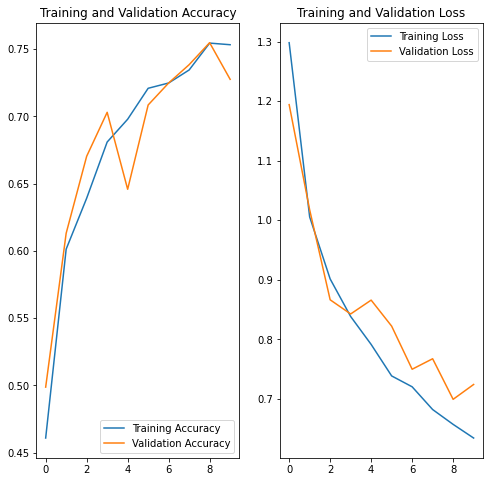

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

plt.show()

Predict on New Data

Saving sunflower2.jpg to sunflower2 (1).jpg


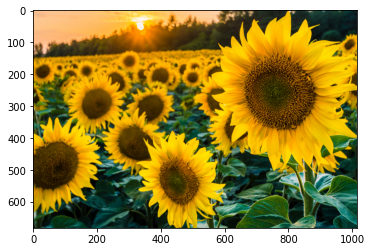

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
gambar = Image.open(BytesIO(uploaded['sunflower2.jpg']))
plt.imshow(gambar)
plt.show()

In [ ]:
#Resize Image
input_size = (180, 180)
imageNew = gambar.convert('RGB').resize(input_size, resample = 0)

#Image to Array
imageArray = keras.preprocessing.image.img_to_array(imageNew)
imageArray = tf.expand_dims(imageArray, 0)

#Predict
predictions = model.predict(imageArray)
score = tf.nn.softmax(predictions[0])

print(
    "Gambar ini adalah jenis bunga '{}' dengaan tingkat akurasi {:.2f}%"
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

Gambar ini adalah jenis bunga 'sunflowers' dengaan tingkat akurasi 86.36%
